### Programación para Análisis de datos

- Luis Roberto Chávez Mancilla
- José Emiliano Figueroa Hernández
- Samantha Abigail Quintero Valadez
- Axel Escoto García

## Stroke Prediction

Este es un caso donde se analizaran distintos pacientes y sus caracteristicas clinicas. El data set se obtuvo de: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

**Sigificado de los campos**

**gender** : "Male", "Female" or "Other"/ nominal

**age**: Edad del paciente / razón

**hypertension**: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión/ nominal

**heart_disease**: 0 si el paciente no tiene enfermedad en el corazón, 1 si el paciente tiene enfermedad en el corazón / nominal

**work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"/ nominal

**Residence_type**: "Rural" or "Urban"/ nominal

**avg_glucose_level**: promedio de glucosa en la sangre / razón

**bmi**: índice de masa corporal / razón

**smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"\* / nominal

**stroke**: 1 si el paciente tuvo un derrame, 0 si no tuvo un derrame / nominal

# Tamaño de la muestra

El tamaño de la muestra es de 5110 registros de pacientes diferentes.

### Características

Los datos son anónimos y el entorno en el que se tomaron las muestras es desconocido.

### Datos transversales

Los datos del data set son transversales ya que no cuentan con una fecha de recopilacion de los datos,

# Preguntas de investigación

- ¿La edad puede ser un factor importante para este tipo de afección?
- ¿Se puede relacionar el fumar con este tipo de afección?
- ¿Cuales son los datos que más se ligan a la aparición de la enfermedad?
- ¿Podríamos predecir si alguien sería propenso a este tipo de afección?
- ¿Es más probable que una mujer padezca un derrame a que lo padezca un hombre?


### Unidad de observación

- Cada fila de la tabla: es un paciente que tuvo o no un derrame, con sus descripciones clínicas

### Unidad de análisis

| **Pregunta de investigación/hipótesis**                          | **Unidad de análisis** |
| ---------------------------------------------------------------- | ---------------------- |
| Edad como factor determinate para sufrir un stroke?              | paciente               |
| ----------------------------------------------------             | ------------------     |
| h0:Los fumadores más propensos a un derrame                      | smoking status         |
| ----------------------------------------------------             | ------------------     |
| Variables que más influyen en la ocurrencia de un derrame        | paciente               |
| ----------------------------------------------------             | ------------------     |
| Deteriminar si un individuo es propenso a sufrir o no un derrame | Paciente               |
| ----------------------------------------------------             | ------------------     |
| h0:Mujeres más propensas que los hombres                         | genero                 |


In [123]:
import pandas as pd
import seaborn as sns
from lifelines import ExponentialFitter
import matplotlib.pyplot as plt

In [124]:
# Para obtener múltiples salidas de una celda
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [125]:
# Leemos los datos mediate el encoding utf-8
data = pd.read_csv("stroke.csv", encoding="utf-8")

In [126]:
# Creamos un backup (copia profunda de los datos) de los datos
data_backup = data.copy()

In [127]:
# Columnas del data set
columns = data.columns
columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Renombrando columna


In [128]:
data = data.rename(columns={"Residence_type": "residence_type"})

In [129]:
# Columnas del data set
columns = data.columns
columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Tipos de datos


In [130]:
nominal = [
    "gender",
    "hypertension",
    "heart_disease",
    "ever_married",
    "work_type",
    "residence_type",
    "smoking_status",
    "stroke",
]
ordinal = []
interval = []
ratio = ["age", "avg_glucose_level", "bmi"]

# Conversion de nominal a categorico


In [131]:
for i in nominal:
    data[i] = data[i].astype("category")

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                4909 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   category
dtypes: category(8), float64(3), int64(1)
memory usage: 200.9 KB


Ahora todos los datos nominales estan en tipo categorico de pandas.


# Datos unicos en los categoricos


In [133]:
for i in nominal:
    print("\nVar: ", i)
    print(data[i].unique())


Var:  gender
['Male', 'Female', 'Other']
Categories (3, object): ['Female', 'Male', 'Other']

Var:  hypertension
[0, 1]
Categories (2, int64): [0, 1]

Var:  heart_disease
[1, 0]
Categories (2, int64): [0, 1]

Var:  ever_married
['Yes', 'No']
Categories (2, object): ['No', 'Yes']

Var:  work_type
['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Categories (5, object): ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']

Var:  residence_type
['Urban', 'Rural']
Categories (2, object): ['Rural', 'Urban']

Var:  smoking_status
['formerly smoked', 'never smoked', 'smokes', 'Unknown']
Categories (4, object): ['Unknown', 'formerly smoked', 'never smoked', 'smokes']

Var:  stroke
[1, 0]
Categories (2, int64): [0, 1]


### Hallazgos

- Tenemos 4 variables dicotómicas: hypertension, heart_disease, Residence_type, y stroke. El resto varian entre 3 a 5 posibles valores lo cual los hace tener una mayor cardinalida sobre el resto, sindo la más alta el tipo de trabajo de la persona observada o work_type.

- Todas las variables categoricas son de baja cardinalidad.


## Exploración de cantidad de muestras por categoría


In [134]:
for i in nominal + ordinal:
    data[i].value_counts()
    print()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

hypertension
0    4612
1     498
Name: count, dtype: int64

heart_disease
0    4834
1     276
Name: count, dtype: int64

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

stroke
0    4861
1     249
Name: count, dtype: int64

### Hallazgos

- Para la variable de heart_disease podemos ver que hay un desvalance entre los datos ya que la mayoria de los pacientes de la muestra no presentan enfermedades en el corazón, solo 276 de la población total presentó este tipo de problema
- Para el genero solo tenemos una fila con valor "other" y el resto estan relativamente equilibradas, teniendo solo un 9% de diferencia entre hombre y mujer (mayor).
- En el dato de "stroke" tenemos que solamente un 5% presentó este problema y el 95% restante no ha sufrido de este.
- La variable de "smoking_status" presenta un problema al tener 1544 datos desconocidos, osea que no se sabe si el paciente fue, es o no es fumador.


# Estadisticas descriptiva de las columnas


In [135]:
for i in nominal + ratio:
    print(i)
    data[i].describe()
    print()

gender


count       5110
unique         3
top       Female
freq        2994
Name: gender, dtype: object


hypertension


count     5110
unique       2
top          0
freq      4612
Name: hypertension, dtype: int64


heart_disease


count     5110
unique       2
top          0
freq      4834
Name: heart_disease, dtype: int64


ever_married


count     5110
unique       2
top        Yes
freq      3353
Name: ever_married, dtype: object


work_type


count        5110
unique          5
top       Private
freq         2925
Name: work_type, dtype: object


residence_type


count      5110
unique        2
top       Urban
freq       2596
Name: residence_type, dtype: object


smoking_status


count             5110
unique               4
top       never smoked
freq              1892
Name: smoking_status, dtype: object


stroke


count     5110
unique       2
top          0
freq      4861
Name: stroke, dtype: int64


age


count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64


avg_glucose_level


count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64


bmi


count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

### Hallazgos

- Para la variable de heart_disease que es nominal, vemos que la moda es 0 (No padecen de enfermedades del corazón), con una frecuencia de 4834 de los 5110
- Para la variable de avg_glucose_level que es de razón pudimos obtener más datos, como lo es la media con un nivel de glucosa de 106.147677 y una desviación estandar de 45.283560
- Dentro de la edad podemos observar que tenemos un valor mínimo de 0.8, lo cual puede significar un recien nacido y tambien tenemos un máximo de 82 años, lo cual puede significar que tenemos una variedad de datos, inclusive de pacientes muy jovenes.


### Dummies

Creacion de las variables dummies para todas las categoricas-nominales.


In [136]:
# Crear dummies que contengan valores numericos dicotómicos (0 y 1) con k columnas
data_dumms_todas = pd.get_dummies(data, dtype=int)
data_dumms_todas

data_dumms_todas.columns

,id,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,...,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_0,stroke_1
0,9046,67.0,228.69,36.6,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
1,51676,61.0,202.21,NaN,1,0,0,1,0,1,...,1,0,1,0,0,0,1,0,0,1
2,31112,80.0,105.92,32.5,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
3,60182,49.0,171.23,34.4,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
4,1665,79.0,174.12,24.0,1,0,0,0,1,1,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,83.75,NaN,1,0,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
5106,44873,81.0,125.20,40.0,1,0,0,1,0,1,...,1,0,0,1,0,0,1,0,1,0
5107,19723,35.0,82.99,30.6,1,0,0,1,0,1,...,1,0,1,0,0,0,1,0,1,0
5108,37544,51.0,166.29,25.6,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0


Index(['id', 'age', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male',
       'gender_Other', 'hypertension_0', 'hypertension_1', 'heart_disease_0',
       'heart_disease_1', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'residence_type_Rural',
       'residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'stroke_0', 'stroke_1'],
      dtype='object')

In [137]:
# Drop dictomic vars (FIRST)
data_dumms_todas = data_dumms_todas.drop(
    [
        "stroke_0",
        "ever_married_No",
        "residence_type_Rural",
        "hypertension_0",
        "heart_disease_0",
    ],
    axis=1,
)
data_dumms_todas

# Nominal columns names
nominal_dumms = [
    "gender_Female",
    "gender_Male",
    "gender_Other",
    "hypertension_1",
    "heart_disease_1",
    "ever_married_Yes",
    "work_type_Govt_job",
    "work_type_Never_worked",
    "work_type_Private",
    "work_type_Self-employed",
    "work_type_children",
    "residence_type_Urban",
    "smoking_status_Unknown",
    "smoking_status_formerly smoked",
    "smoking_status_never smoked",
    "smoking_status_smokes",
    "stroke_1",
]

,id,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,9046,67.0,228.69,36.6,0,1,0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
1,51676,61.0,202.21,NaN,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
2,31112,80.0,105.92,32.5,0,1,0,0,1,1,...,0,1,0,0,0,0,0,1,0,1
3,60182,49.0,171.23,34.4,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,1
4,1665,79.0,174.12,24.0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,83.75,NaN,1,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
5106,44873,81.0,125.20,40.0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
5107,19723,35.0,82.99,30.6,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
5108,37544,51.0,166.29,25.6,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


# Porcentajes de datos por categorico


In [138]:
for i in nominal:
    print("\nVar: ", i)
    print(data[i].value_counts(normalize=True) * 100)


Var:  gender
gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64

Var:  hypertension
hypertension
0    90.254403
1     9.745597
Name: proportion, dtype: float64

Var:  heart_disease
heart_disease
0    94.598826
1     5.401174
Name: proportion, dtype: float64

Var:  ever_married
ever_married
Yes    65.616438
No     34.383562
Name: proportion, dtype: float64

Var:  work_type
work_type
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: proportion, dtype: float64

Var:  residence_type
residence_type
Urban    50.802348
Rural    49.197652
Name: proportion, dtype: float64

Var:  smoking_status
smoking_status
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: proportion, dtype: float64

Var:  stroke
stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


# Axel

Yo me encargaré del análisis univariado para las siguientes varaibles

- gender
- smoking status
- age


### Genero


In [139]:
# Obtenemos el conteo de los valores en los datos para graficar
pc_gender = data.gender.value_counts(normalize=True) * 100
pc_gender

gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64

In [140]:
# Obtenemos la frecuencia de cada categoria
freq_gender = data.gender.value_counts()
freq_gender, freq_gender.values

(gender
 Female    2994
 Male      2115
 Other        1
 Name: count, dtype: int64,
 array([2994, 2115,    1], dtype=int64))

([<matplotlib.patches.Wedge at 0x18fbd0734d0>,
 [Text(-0.29329251556156405, 1.0601789944700706, 'Female'),
  Text(0.2926407116602305, -1.0603590966644243, 'Male'),
  Text(1.0999997921700193, -0.0006761848226571827, 'Other')],
 [Text(-0.15997773576085308, 0.5782794515291293, '58.59%'),
  Text(0.1596222063601257, -0.5783776890896859, '41.39%'),
  Text(0.5999998866381923, -0.000368828085085736, '0.02%')])

<BarContainer object of 3 artists>

<Axes: xlabel='gender', ylabel='count'>

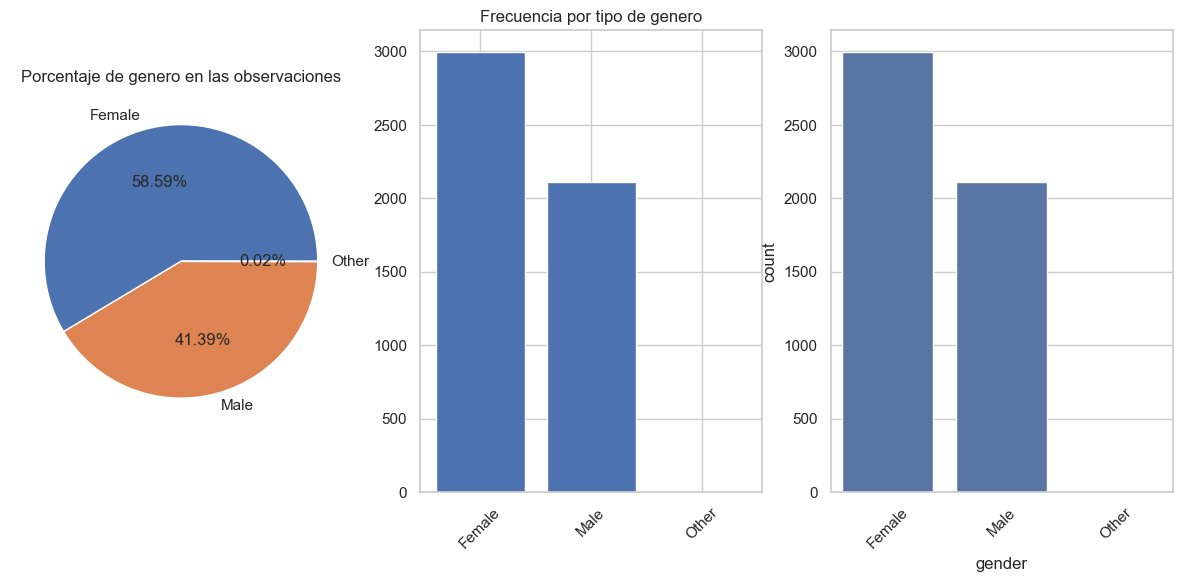

In [141]:
# Creamos las graficas graficas

fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Pie
ax[0].pie(pc_gender, labels=pc_gender.index, autopct="%.2f%%")
ax[0].title.set_text("Porcentaje de genero en las observaciones")
# Bar - Countplot
ax[1].bar(freq_gender.index, height=freq_gender.values)
ax[1].title.set_text("Frecuencia por tipo de genero")
sns.countplot(data=data, x="gender", ax=ax[2])
ax[1].tick_params(axis="x", rotation=45)
ax[2].tick_params(axis="x", rotation=45)

plt.show()

([<matplotlib.patches.Wedge at 0x18fbefa8d40>,
 [Text(-0.29329251556156405, 1.0601789944700706, 'Female'),
  Text(0.2926407116602305, -1.0603590966644243, 'Male'),
  Text(1.0999997921700193, -0.0006761848226571827, 'Other')],
 [Text(-0.19997216970106635, 0.7228493144114116, '58.59%'),
  Text(0.19952775795015715, -0.7229721113621075, '41.39%'),
  Text(0.7499998582977404, -0.00046103510635717, '0.02%')])

Text(0.5, 1.0, 'Porcentaje de genero en las observaciones')

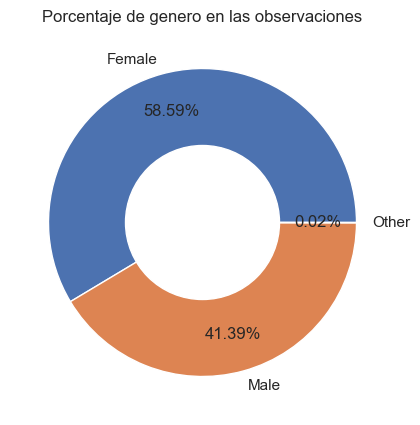

In [142]:
# Gráfica de dona

plt.pie(
    pc_gender,
    labels=pc_gender.index,
    autopct="%1.2f%%",
    pctdistance=0.75,
)
centre_circle = plt.Circle((0, 0), 0.5, fc="white")
fig = plt.gcf()
fig.set_figwidth(5)
fig.set_figheight(5)
fig.gca().add_artist(centre_circle)
plt.title("Porcentaje de genero en las observaciones")

plt.show()

#### Hallazgos de la variable genero

- Observamos que la mayoria de datos esta en la categoria "female", seguida por "male" por un 9% aproximadamente.
- La variable esta relativamente balanceada para los generos masculino y femenino, pero no para otros("other").


### Smoking status

Dentro de esta viarable tenemos 4 categorias:

- Unknown
- Never smoked
- Formerly smoked
- Smokes


In [143]:
# creamos los procentajes de los datos
pc_smoking_status = data.smoking_status.value_counts(normalize=True) * 100
pc_smoking_status

labels_smoking_status = pc_smoking_status.index.categories
labels_smoking_status

# Creamos las frecuencias de cada categoria
freq_smoking_status = data.smoking_status.value_counts()
freq_smoking_status

smoking_status
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: proportion, dtype: float64

Index(['Unknown', 'formerly smoked', 'never smoked', 'smokes'], dtype='object')

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x18fc05b29c0>,
 [Text(0.4360558052658317, 1.0098788712979232, 'never smoked'),
  Text(-1.090135360565775, -0.14698603894291268, 'Unknown'),
  Text(0.062183366884617904, -1.0982409703170308, 'formerly smoked'),
  Text(0.973105379249873, -0.5128995231767731, 'smokes')],
 [Text(0.23784862105409, 0.550843020707958, '37.0%'),
  Text(-0.5946192875813319, -0.08017420305977054, '30.2%'),
  Text(0.03391820011888249, -0.5990405292638349, '17.3%'),
  Text(0.5307847523181124, -0.27976337627823983, '15.4%')])

<BarContainer object of 4 artists>

<Axes: xlabel='smoking_status', ylabel='count'>

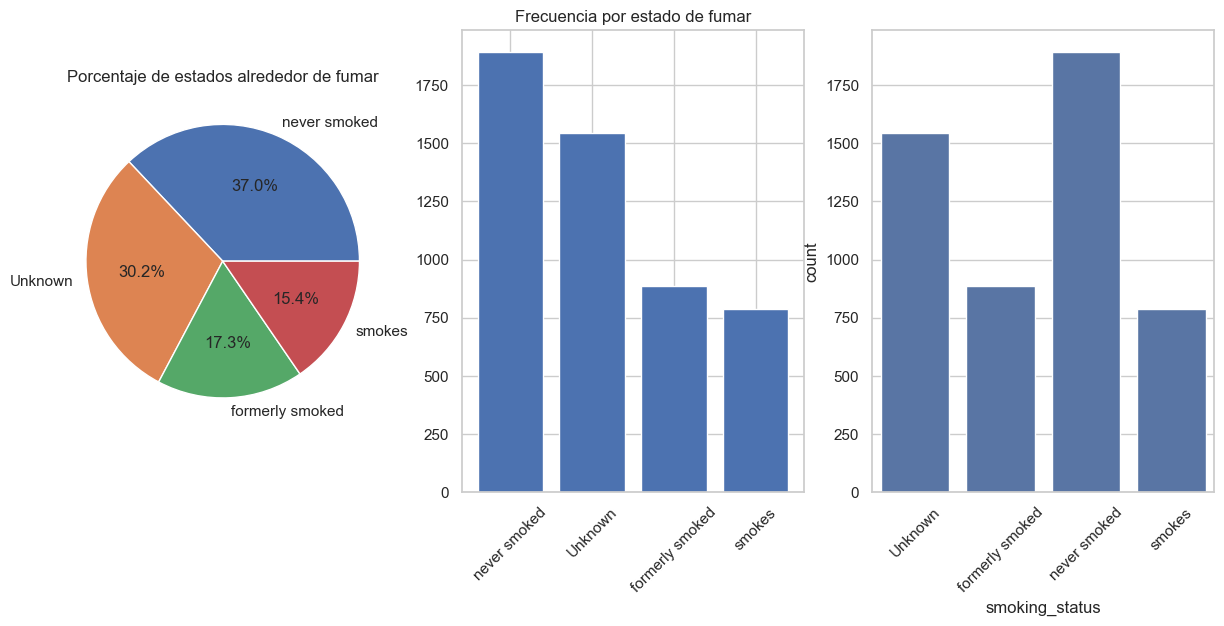

In [144]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Gráfico pie
ax[0].pie(pc_smoking_status, labels=pc_smoking_status.index, autopct="%.1f%%")
ax[0].title.set_text("Porcentaje de estados alrededor de fumar")

# Gráfico de barras
ax[1].bar(freq_smoking_status.index, height=freq_smoking_status.values)
ax[1].title.set_text("Frecuencia por estado de fumar")
ax[1].tick_params(axis="x", rotation=45)
# Creamos el segundo plot de barras de seanborn
sns.countplot(data=data, x="smoking_status", ax=ax[2])
ax[2].tick_params(axis="x", rotation=45)

#### Hallazgos

- Tenemos un gran volumen de datos que están categorizados como "unknown" (30.2%), lo cual significa que no sabemos si fumaron o no. Esto reduce nuestos datos utilizables para encontrar una correlación entre fumar y los derrames.
- El 37% de los datos registran que nunca han fumado, lo cual presenta un desequilibro con respecto a las personas que fuman (15.4%) y a las que fumaban (17.3%).


### Age

Es una variable de razon que registra las edades de las observaciones.

Al ser de razon haremos uso de histogramas


<Axes: xlabel='age', ylabel='Count'>

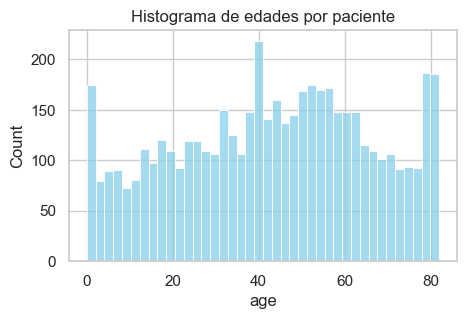

In [145]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.histplot(data=data, x="age", bins=40, color="Skyblue")
ax.title.set_text("Histograma de edades por paciente")

#### Interpretacion de histograma de edad

- Los datos de edad estan bastanque equilibrados ya que contamos con datos de personas jovenes, asi como de personas adultas y mayores


<Axes: xlabel='age', ylabel='Count'>

C:\Users\Emiliano\AppData\Local\Temp\ipykernel_10532\127128313.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_dumms_todas.age, ax=ax[0,1], palette="Blues")


<Axes: xlabel='age'>

C:\Users\Emiliano\AppData\Local\Temp\ipykernel_10532\127128313.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_dumms_todas, y="age", errcolor="red", ax=ax[1,0], palette="Blues")
C:\Users\Emiliano\AppData\Local\Temp\ipykernel_10532\127128313.py:6: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'red'}` instead.

  sns.barplot(data=data_dumms_todas, y="age", errcolor="red", ax=ax[1,0], palette="Blues")


<Axes: ylabel='age'>

C:\Users\Emiliano\AppData\Local\Temp\ipykernel_10532\127128313.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data_dumms_todas.age, ax=ax[1,1], palette="Blues")


<Axes: xlabel='age'>

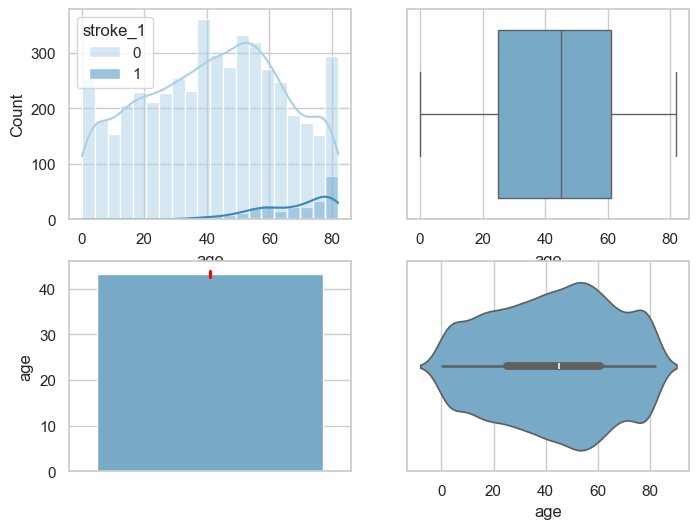

In [146]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
# Usamos un histograma con referencia a si tuvieron o no un derrame (0: no tuvieron, 1: si tuvieron)
sns.histplot(
    data=data_dumms_todas,
    x="age",
    hue="stroke_1",
    kde=True,
    ax=ax[0, 0],
    palette="Blues",
)
# grafica de bigotes
sns.boxplot(x=data_dumms_todas.age, ax=ax[0, 1], palette="Blues")
sns.barplot(
    data=data_dumms_todas, y="age", errcolor="red", ax=ax[1, 0], palette="Blues"
)
sns.violinplot(x=data_dumms_todas.age, ax=ax[1, 1], palette="Blues")

In [147]:
data_dumms_todas.age.describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

#### Hallazgos e interpretaciones

- Tenemos una desviación estándar bastante reducida, lo cual indica una baja dispersión de los datos.
- Los derrames parecen ser más comunes en edades más altas, siendo 40 años, aproximadamente, donde empiezan a volverse más comunes y la curva empieza a subir
- La media es un poco menor que la mediana (50%).
- La densidad de 40 a 60 años es mayore que el resto de edades


# Samantha

Yo me encargaré del análisis univariado para las siguientes varaibles

- heart disease
- average glucose level


In [148]:
pc_heart_disease = data.heart_disease.value_counts(normalize=True) * 100
pc_heart_disease

heart_disease
0    94.598826
1     5.401174
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x18fc0dee090>,
 [Text(-1.0842021913429936, 0.18575685259782707, 'no'),
  Text(1.084202178299132, -0.1857569287305783, 'yes')],
 [Text(-0.7392287668247683, 0.12665239949851845, '94.6%'),
  Text(0.7392287579312264, -0.12665245140721249, '5.4%')])

C:\Users\Emiliano\AppData\Local\Temp\ipykernel_10532\1296803446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x ="heart_disease",palette=["#7093DB", '#f0e68c'],ax=ax[1])


<Axes: xlabel='heart_disease', ylabel='count'>

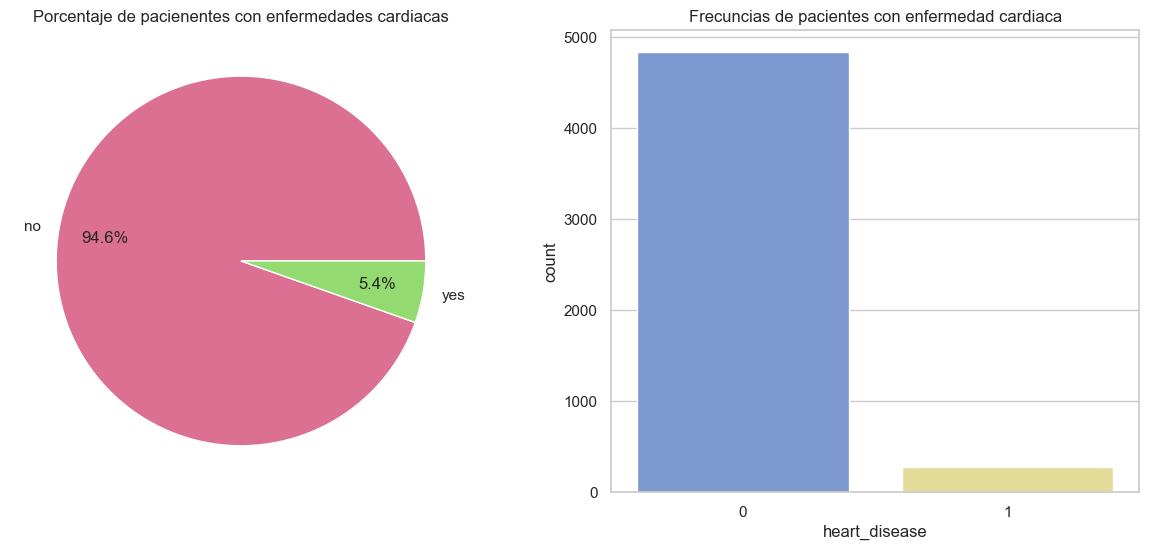

In [149]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
palette_color = ["#db7093", "#93DB70"]
lables = ["no", "yes"]
# Pie
ax[0].pie(
    pc_heart_disease,
    labels=lables,
    colors=palette_color,
    autopct="%.1f%%",
    pctdistance=0.75,
)
ax[0].title.set_text("Porcentaje de pacienentes con enfermedades cardiacas")
# Countplot
sns.countplot(data=data, x="heart_disease", palette=["#7093DB", "#f0e68c"], ax=ax[1])
ax[1].title.set_text("Frecuncias de pacientes con enfermedad cardiaca")
plt.show()

### Hallazgos de la variable de Heart Disease

- Podemos ver que la mayoria de la población estudiada no presenta ninguna enfermedad en el corazón, siendo un 94.6%.
- Con el histograma de la frecuencia podemos ver que los datos están desvalanceados ya que las personas que padecen de este tipo de enfermedades es poca pero por la cantidad de datos no es despreciable.


<Axes: xlabel='avg_glucose_level', ylabel='Count'>

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

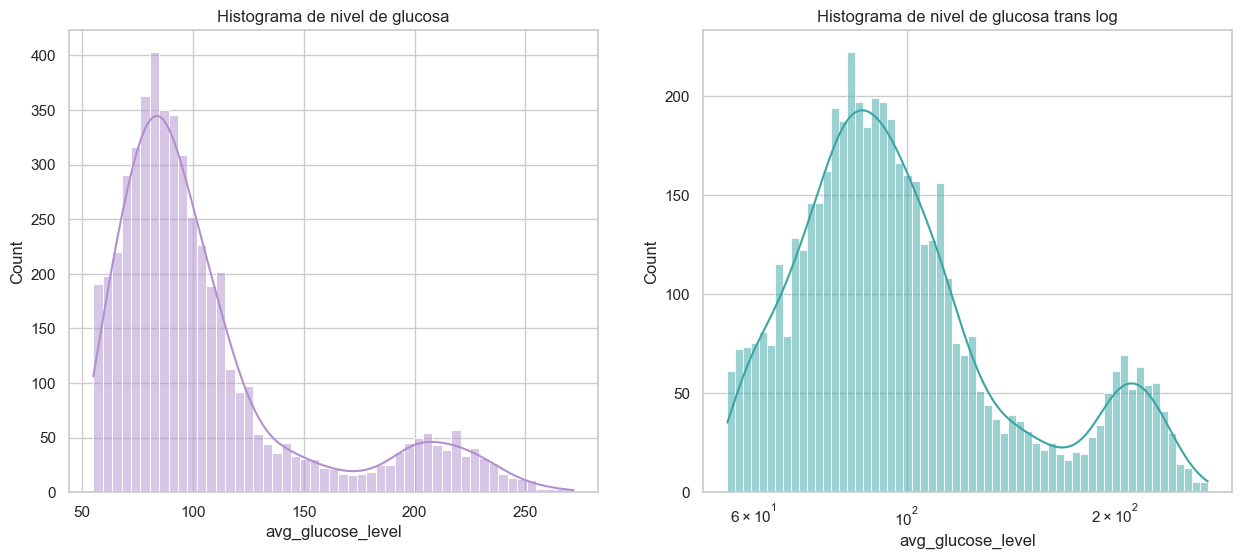

In [150]:
# Histograma del nivel de glucosa
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(data=data, x="avg_glucose_level", kde=True, ax=ax[0], color="#B28FCE")
ax[0].title.set_text("Histograma de nivel de glucosa")
# Histograma llevado a logaritmica para intentar normalizar los datos
sns.histplot(
    data=data,
    x="avg_glucose_level",
    kde=True,
    log_scale=True,
    ax=ax[1],
    color="#39A5A5",
    bins=60,
)
ax[1].title.set_text("Histograma de nivel de glucosa trans log")

<Axes: xlabel='avg_glucose_level'>

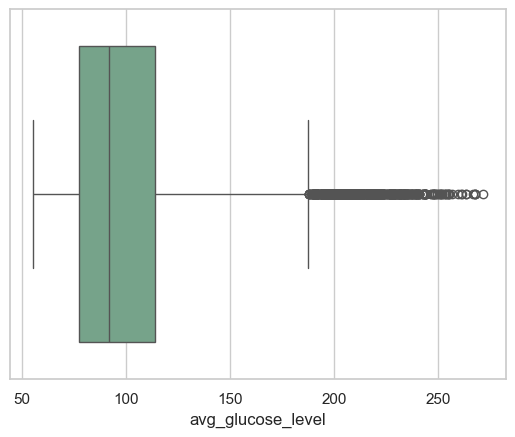

In [151]:
# Se ajusta el boxplot para evitar el exceso de outliers, que no se borrán porque pueden ser de interes para futuros analisis
sns.boxplot(data=data, x="avg_glucose_level", whis=2.0, color="#6EAA89")

In [152]:
data["avg_glucose_bn"] = pd.qcut(data.avg_glucose_level, q=4)
data["avg_glucose_bn"]

0       (114.09, 271.74]
1       (114.09, 271.74]
2       (91.885, 114.09]
3       (114.09, 271.74]
4       (114.09, 271.74]
              ...       
5105    (77.245, 91.885]
5106    (114.09, 271.74]
5107    (77.245, 91.885]
5108    (114.09, 271.74]
5109    (77.245, 91.885]
Name: avg_glucose_bn, Length: 5110, dtype: category
Categories (4, interval[float64, right]): [(55.119, 77.245] < (77.245, 91.885] < (91.885, 114.09] < (114.09, 271.74]]

2    1278
0    1278
3    1277
1    1277
Name: count, dtype: int64

<Axes: >

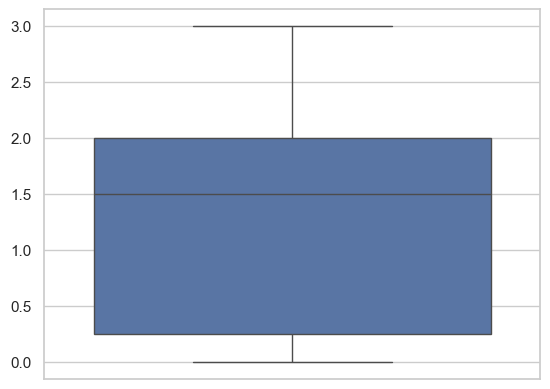

In [153]:
data["avg_glucose_bn"].cat.codes.value_counts()
sns.boxplot(data=data["avg_glucose_bn"].cat.codes)

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

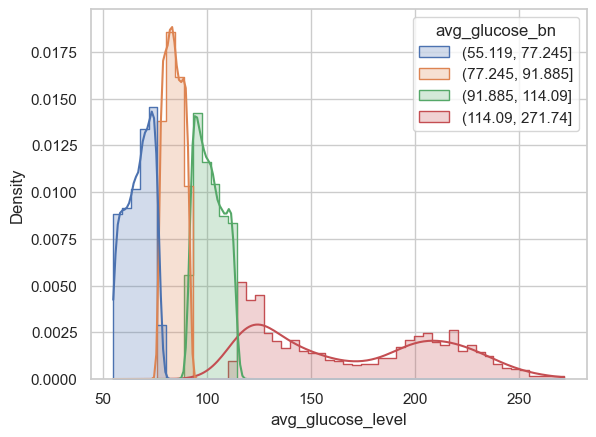

In [154]:
sns.histplot(
    data=data,
    x="avg_glucose_level",
    hue="avg_glucose_bn",
    kde=True,
    element="step",
    stat="density",
)

### Hallazgos de la variable de Avg Glucose Level

- En el histograma pudimos observar que los datos no están normalizados ni siquiera cuando de les aplica una función log. Esto nos dice que el nivel de glucosa en su mayoria de encuentra entre el 70 y 100, pero una gran parte de la población de la muestra también maneja su nivel de glucos entre los 170 y 250
- Con la variable del promedio del nivel de glucosa podemos ver que la mediana esta por el 90 y el primer rango intercuartil y el tercero están en el 77 y 114 respectivamente.
- En el caso del boxplot obtivimos demasiados outliers por lo mismo de que un buen porcentaje de la población manejaba su nivel de glucosa más alto, por lo que tuvo que añadir una nueva columna donde de le aplico un qcut a los datos para poder meterlos en rangos y poder analisarlos. De esta la mediana nos queda en 1.5 que seria un valor intermedio entre el 1(114.09, 271.74] y el 2(91.885, 114.09]


# Emiliano


## hypertension


In [155]:
# Obtenemos el conteo de los valores en los datos para graficar
pc_hypertension = data.hypertension.value_counts(normalize=True) * 100
pc_hypertension

hypertension
0    90.254403
1     9.745597
Name: proportion, dtype: float64

In [156]:
# Obtenemos la frecuencia de cada categoria
freq_hypertension = data.hypertension.value_counts()
freq_hypertension, freq_hypertension.values

(hypertension
 0    4612
 1     498
 Name: count, dtype: int64,
 array([4612,  498], dtype=int64))

([<matplotlib.patches.Wedge at 0x18fc16613d0>,
 [Text(-1.0488454518125865, 0.3315467059285184, '0'),
  Text(1.0488454440521755, -0.3315467304785183, '1')],
 [Text(-0.5720975191705017, 0.18084365777919187, '90.25%'),
  Text(0.5720975149375501, -0.1808436711701009, '9.75%')])

<BarContainer object of 2 artists>

<Axes: xlabel='hypertension', ylabel='count'>

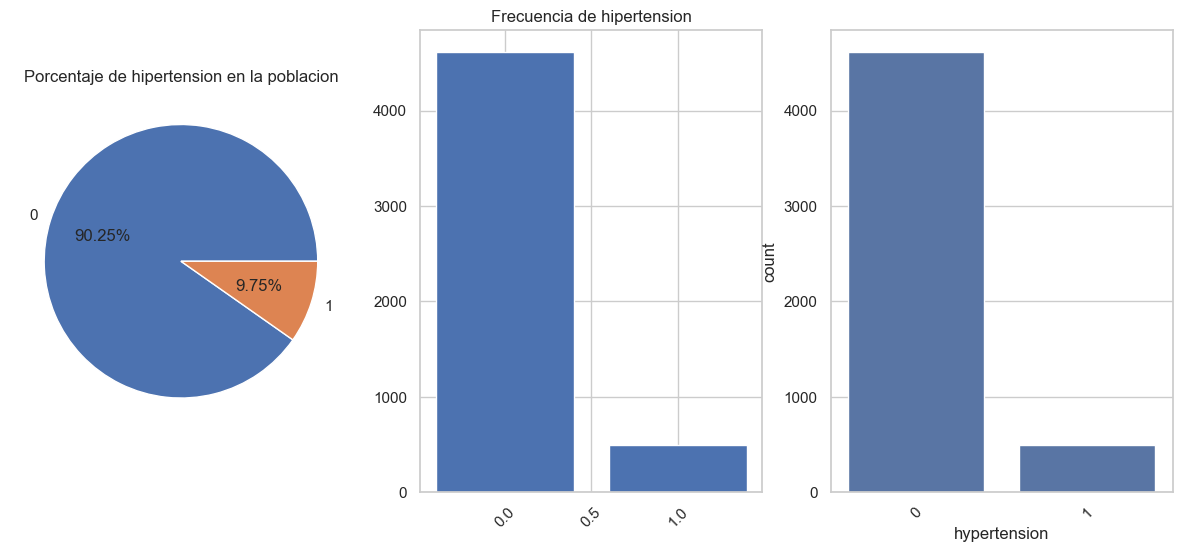

In [157]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

ax[0].pie(pc_hypertension, labels=pc_hypertension.index, autopct="%.2f%%")
ax[0].title.set_text("Porcentaje de hipertension en la poblacion")

ax[1].bar(freq_hypertension.index, height=freq_hypertension.values)
ax[1].title.set_text("Frecuencia de hipertension")
sns.countplot(data=data, x="hypertension", ax=ax[2])
ax[1].tick_params(axis="x", rotation=45)
ax[2].tick_params(axis="x", rotation=45)

plt.show()

### Hallazgos de la variable hypertension

- En el grafico de pastel podemos obvervar que de los registros hypertension son muy pocos (9.75%).
- El histograma de la frecuencia nos muestra que los datos están desvalanceados, son pocas las personas que padecen de este tipo de condicion pero la suficiente para que los datos sean relevantes para el analisis.


## stroke


In [158]:
pc_stroke = data.stroke.value_counts(normalize=True) * 100
pc_stroke

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

In [159]:
freq_stroke = data.stroke.value_counts()
freq_stroke, freq_stroke.values

(stroke
 0    4861
 1     249
 Name: count, dtype: int64,
 array([4861,  249], dtype=int64))

([<matplotlib.patches.Wedge at 0x18fc3041670>,
 [Text(-1.0871361767453498, 0.16773471081294875, '0'),
  Text(1.08713620619119, -0.16773451996600572, '1')],
 [Text(-0.5929833691338271, 0.09149166044342659, '95.13%'),
  Text(0.5929833851951946, -0.09149155634509401, '4.87%')])

<BarContainer object of 2 artists>

<Axes: xlabel='stroke', ylabel='count'>

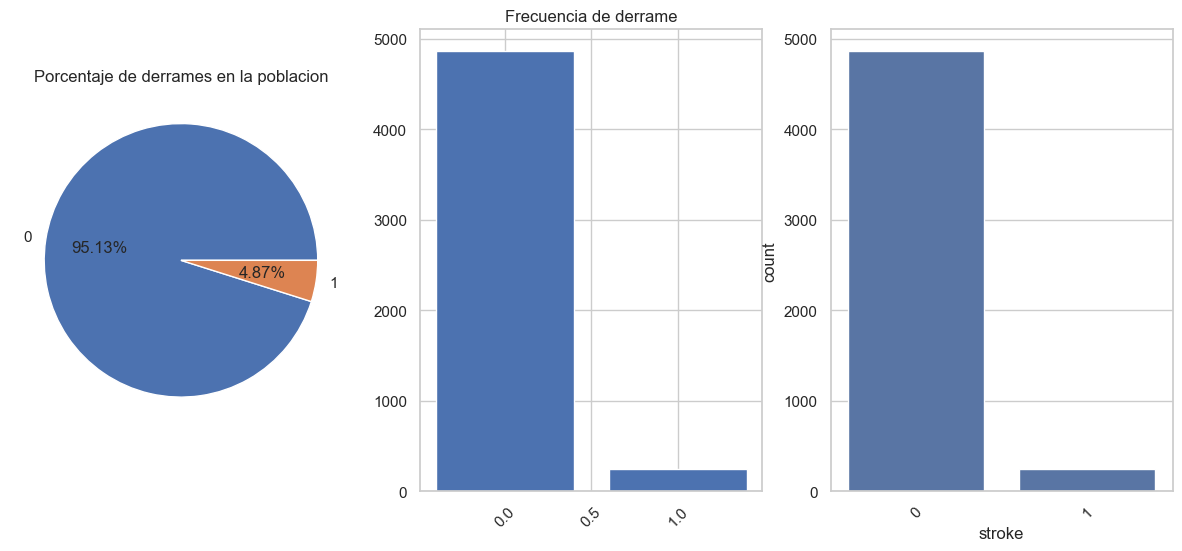

In [160]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

ax[0].pie(pc_stroke, labels=pc_stroke.index, autopct="%.2f%%")
ax[0].title.set_text("Porcentaje de derrames en la poblacion")

ax[1].bar(freq_stroke.index, height=freq_stroke.values)
ax[1].title.set_text("Frecuencia de derrame")
sns.countplot(data=data, x="stroke", ax=ax[2])
ax[1].tick_params(axis="x", rotation=45)
ax[2].tick_params(axis="x", rotation=45)

plt.show()

### Hallazgos de la variable stroke

- En el grafico de pastel podemos obvervar que de los strokes son muy pocos (4.87%), dado que es nuestra variable de muestreo y los registros son muy pocos se aplicará la tecnica de oversampling.
- El histograma de la frecuencia nos muestra que los datos están desvalanceados, son pocas las personas que han padecidod un derrame. Debido a que es nuestra variable dependiente se recomienda aplicar la tecnica de oversampling para tener un mejor analisis.


## bmi


### Limpieaza de datos


In [161]:
data_bmi_nonan = data.dropna(subset=["bmi"])
data_bmi_nonan

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_bn
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,"(114.09, 271.74]"
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,"(91.885, 114.09]"
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,"(114.09, 271.74]"
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,"(114.09, 271.74]"
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,"(114.09, 271.74]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0,"(91.885, 114.09]"
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,"(114.09, 271.74]"
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,"(77.245, 91.885]"
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,"(114.09, 271.74]"


### Graficas


<Axes: xlabel='bmi', ylabel='Count'>

Text(0.5, 1.0, 'Histograma de bmi')

<Axes: xlabel='bmi', ylabel='Count'>

Text(0.5, 1.0, 'Histograma de bmi log')

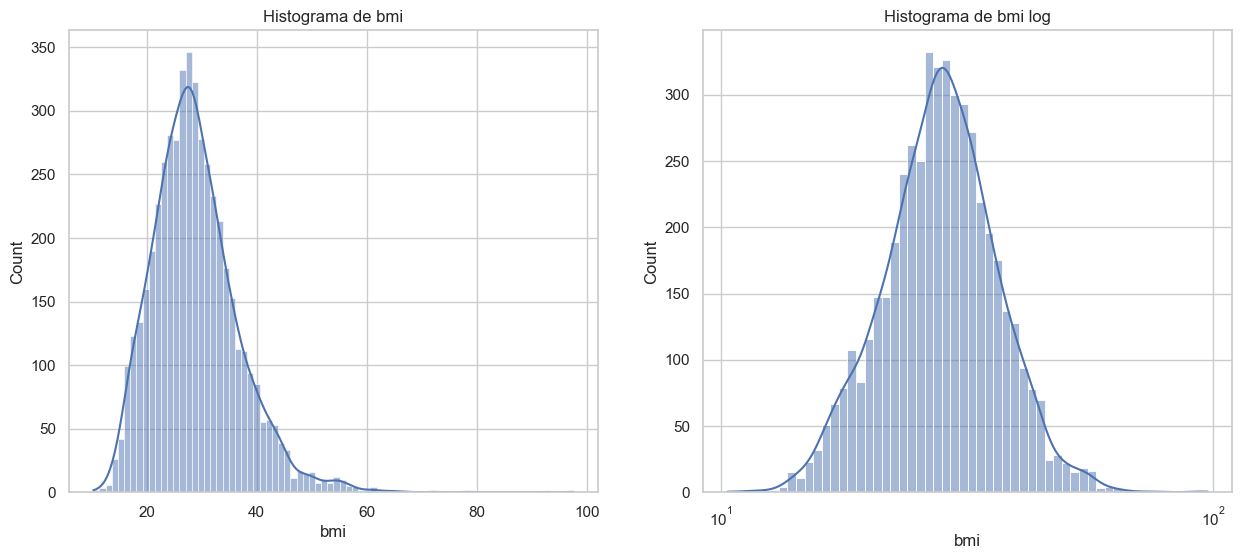

In [162]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Histograma de 'bmi' sin valores NaN
sns.histplot(data=data_bmi_nonan, x="bmi", kde=True, ax=ax[0])
ax[0].set_title("Histograma de bmi")

# Histograma de 'bmi' sin valores NaN en escala logarítmica
sns.histplot(data=data_bmi_nonan, x="bmi", kde=True, log_scale=True, ax=ax[1])
ax[1].set_title("Histograma de bmi log")

plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='bmi'>

Text(0.5, 1.0, 'Boxplot de bmi')

Text(0.5, 0, 'BMI')

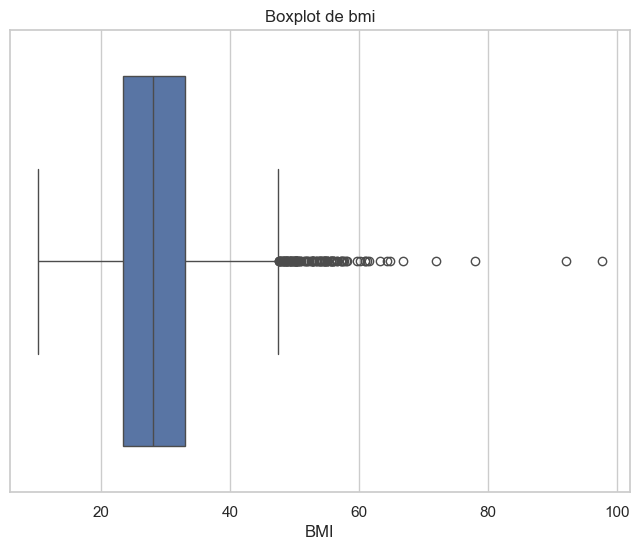

In [163]:
# Configura el estilo del boxplot
sns.set(style="whitegrid")

# Crea el boxplot
# Ajusta el tamaño de la figura si es necesario
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_bmi_nonan, x="bmi")

# Configura el título y etiquetas de los ejes
plt.title("Boxplot de bmi")
plt.xlabel("BMI")

# Muestra el boxplot
plt.show()

### Hallazgos de la variable bmi

- En las variables bmi encontramos variables de tipo NaN, y dado que era un aproximado del 5% decidimos omitir los registros NaN para el analisis de la variable.
- En el diagrama de caja y bigotes de bmi podemos ver que la mediana esta en aproximadamente 25.
- Obtivimos demasiados outliers debido a que un buen porcentaje de la población tenia un bmi alto.


# Roberto

Las variables a las cuales tengo que hacer el análisis univariado son las siguientes:

- Ever married
- Work type
- Residence type


### Ever married

Esta es una variable nominal para mostrar si la persona alguna vez estuvo casado, esta casado, o si es soltero. Con esta variable podremos analizar si tiene alguna relación que las personas han estado casadas o lo están con los strokes.

- _Yes_. Si lo estuvo o está
- _No_. Si nunca ha estado casado ni lo está.


In [164]:
# Obtenemos el conteo de los valores en los datos para graficar
percentage_ever_married = data.ever_married.value_counts(normalize=True) * 100
percentage_ever_married

ever_married
Yes    65.616438
No     34.383562
Name: proportion, dtype: float64

In [165]:
# Obtenemos la frecuencia de cada categoria
freq_ever_married = data.ever_married.value_counts()
freq_ever_married, freq_ever_married.values

(ever_married
 Yes    3353
 No     1757
 Name: count, dtype: int64,
 array([3353, 1757], dtype=int64))

([<matplotlib.patches.Wedge at 0x18fc3f34470>,
 [Text(-0.5182755321100738, 0.9702527881001013, 'Yes'),
  Text(0.5182755321100742, -0.9702527881001012, 'No')],
 [Text(-0.28269574478731296, 0.5292287935091461, '65.62%'),
  Text(0.28269574478731313, -0.529228793509146, '34.38%')])

<BarContainer object of 2 artists>

<Axes: xlabel='ever_married', ylabel='count'>

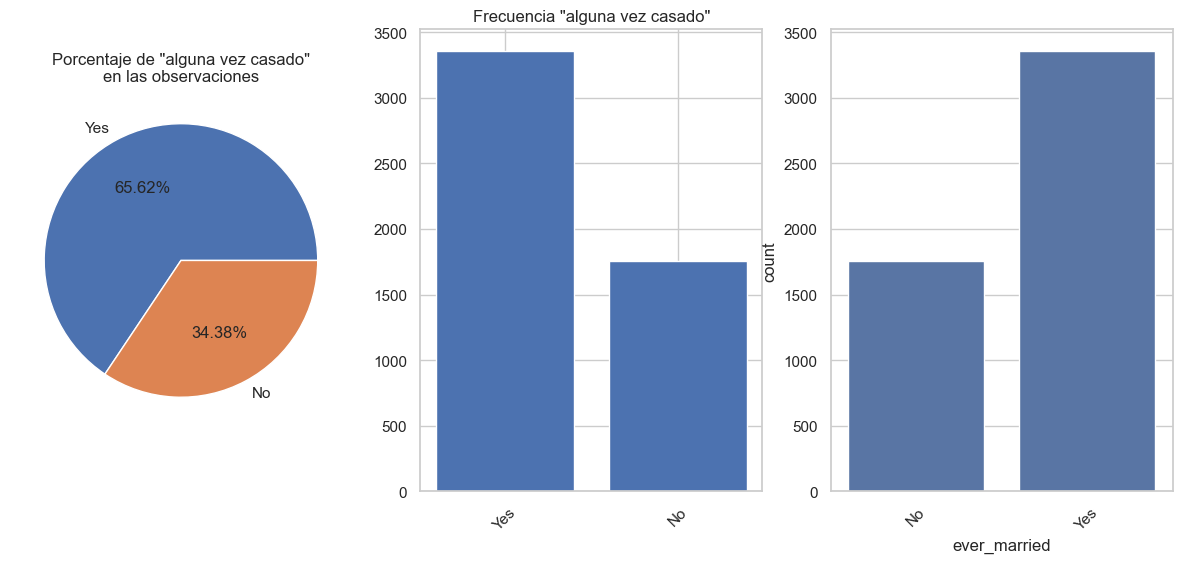

In [166]:
# Creamos las graficas graficas

fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Pie
ax[0].pie(
    percentage_ever_married, labels=percentage_ever_married.index, autopct="%.2f%%"
)
ax[0].title.set_text('Porcentaje de "alguna vez casado"\nen las observaciones')
# Bar - Countplot
ax[1].bar(freq_ever_married.index, height=freq_ever_married.values)
ax[1].title.set_text('Frecuencia "alguna vez casado"')
sns.countplot(data=data, x="ever_married", ax=ax[2])
ax[1].tick_params(axis="x", rotation=45)
ax[2].tick_params(axis="x", rotation=45)

plt.show()

([<matplotlib.patches.Wedge at 0x18fc40020f0>,
 [Text(-0.5182755321100738, 0.9702527881001013, 'Yes'),
  Text(0.5182755321100742, -0.9702527881001012, 'No')],
 [Text(-0.35336968098414123, 0.6615359918864326, '65.62%'),
  Text(0.35336968098414145, -0.6615359918864325, '34.38%')])

Text(0.5, 1.0, 'Porcentaje de alguna vez casado en las observaciones')

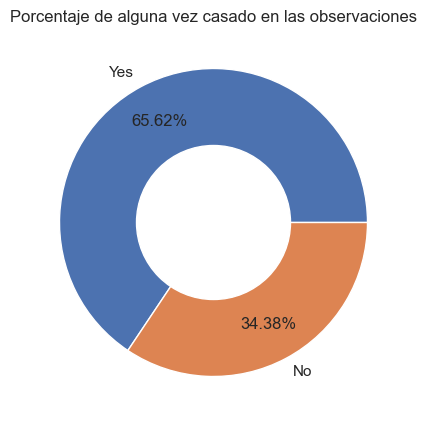

In [167]:
# Grafica de dona
plt.pie(
    percentage_ever_married,
    labels=percentage_ever_married.index,
    autopct="%1.2f%%",
    pctdistance=0.75,
)
centre_circle = plt.Circle((0, 0), 0.5, fc="white")  # white
fig = plt.gcf()
fig.set_figwidth(5)
fig.set_figheight(5)
fig.gca().add_artist(centre_circle)
plt.title("Porcentaje de alguna vez casado en las observaciones")

plt.show()

#### Hallazgos

- Podemos ver que la mayor parte de las peresonas de nuestra población están casados o alguna vez lo estuvieron.
- Se puede apreciar como es que hay una diferencia del 31.24% de las personas que si estuvieron casadas con las que no.


### Work type

En esta columna podemos ver los distintos tipos de trabajos de las personas, si nunca han trabajado, o si son menores de edad. Las categorias se muestran a continuación.

Dentro de esta viarable tenemos 5 categorias:

- Private
- Self emplyed
- Children
- Government job
- Never Worked


In [168]:
# creamos los procentajes los datos
percentage_work_type = data.work_type.value_counts(normalize=True) * 100
percentage_work_type

# labels
labels_work_type = percentage_work_type.index.categories
labels_work_type

# Creamos las frecuencias de cada categoria
freq_work_type = data.work_type.value_counts()
freq_work_type

work_type
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: proportion, dtype: float64

Index(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'], dtype='object')

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [169]:
# Moda
mode = data["work_type"].mode()
print("La moda (work_type): ", mode)

La moda (work_type):  0    Private
Name: work_type, dtype: category
Categories (5, object): ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']


([<matplotlib.patches.Wedge at 0x18fbcec5b20>,
 [Text(-0.24806852328675594, 1.0716631969767034, 'Private'),
  Text(-0.6322566158099601, -0.900139751241182, 'Self-employed'),
  Text(0.33927572331736017, -1.0463708633020523, 'children'),
  Text(0.9994172244804616, -0.45952716068995414, 'Govt_job'),
  Text(1.0998993909458559, -0.014877156883478713, 'Never_worked')],
 [Text(-0.13531010361095777, 0.5845435619872926, '57.24%'),
  Text(-0.3448672449872509, -0.49098531885882646, '16.03%'),
  Text(0.18505948544583278, -0.5707477436193011, '13.44%'),
  Text(0.5451366678984335, -0.2506511785581568, '12.86%'),
  Text(0.5999451223341031, -0.008114812845533842, '0.43%')])

<BarContainer object of 5 artists>

<Axes: xlabel='work_type', ylabel='count'>

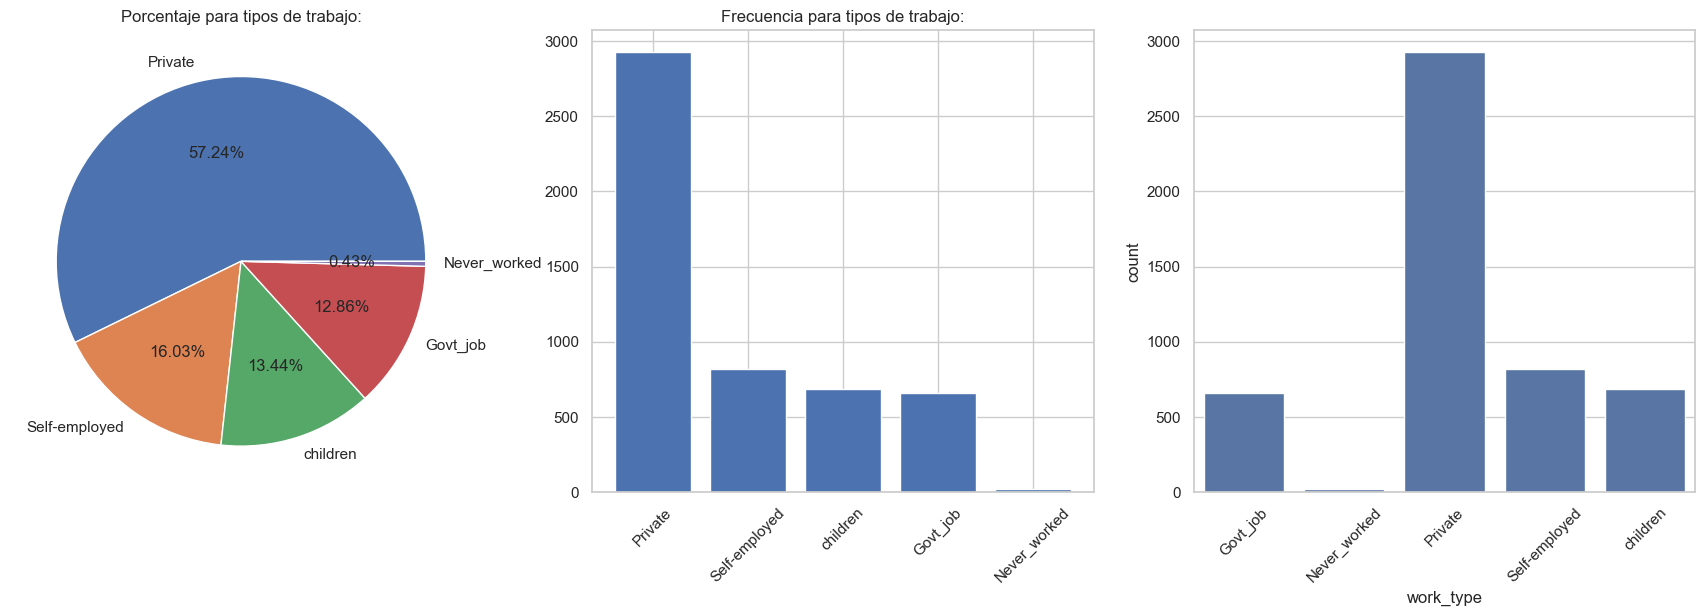

In [170]:
# Creando las graficas
fig, ax = plt.subplots(1, 3, figsize=(22, 6))
# Gráfico pie
ax[0].pie(percentage_work_type, labels=percentage_work_type.index, autopct="%.2f%%")
ax[0].title.set_text("Porcentaje para tipos de trabajo:")

# Gráfico de barras
ax[1].bar(freq_work_type.index, height=freq_work_type.values)
ax[1].title.set_text("Frecuencia para tipos de trabajo:")
ax[1].tick_params(axis="x", rotation=45)
# Creamos el segundo plot de barras de seanborn
sns.countplot(data=data, x="work_type", ax=ax[2])
ax[2].tick_params(axis="x", rotation=45)

### Hallazgos

- Esta variable es de baja cardinalidad ya que hay pocos valores únicos. Menos de 6 (Private, Self Employed, Children, Goverment Job, Never Worked).
- Las muestras no están balanceadas ya que las personas que tienen un tipo de trabajo privado son la mayoría con un 57.24%, seguido con las personas que son self-employed con un 16.03%, después tenemos a las peronas en la muestra que nunca han trabajado por ser menores de edad o "children" con un 13.44%.
- La moda en esta columna es de las personas que cuentan con un trabajo de tipo private.


### Residence Type

En esta variable nos dice de nuestra muestra cuántas son las personas que viven en cada categoría de vivienda.

Los valores de nuestra columna son los siguientes:

- Rural
- Urban


In [171]:
# creamos los procentajes los datos
percentage_residence_t = data.residence_type.value_counts(normalize=True) * 100
percentage_residence_t

# labels
labels_residence_t = percentage_residence_t.index.categories
labels_residence_t

# Creamos las frecuencias de cada categoria
freq_residence_t = data.residence_type.value_counts()
freq_residence_t

residence_type
Urban    50.802348
Rural    49.197652
Name: proportion, dtype: float64

Index(['Rural', 'Urban'], dtype='object')

residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x18fbce7b3e0>,
 [Text(-0.02772429096401782, 1.0996505643569428, 'Urban'),
  Text(0.027724290964017198, -1.0996505643569428, 'Rural')],
 [Text(-0.0151223405258279, 0.5998093987401505, '50.8%'),
  Text(0.01512234052582756, -0.5998093987401506, '49.2%')])

<BarContainer object of 2 artists>

<Axes: xlabel='residence_type', ylabel='count'>

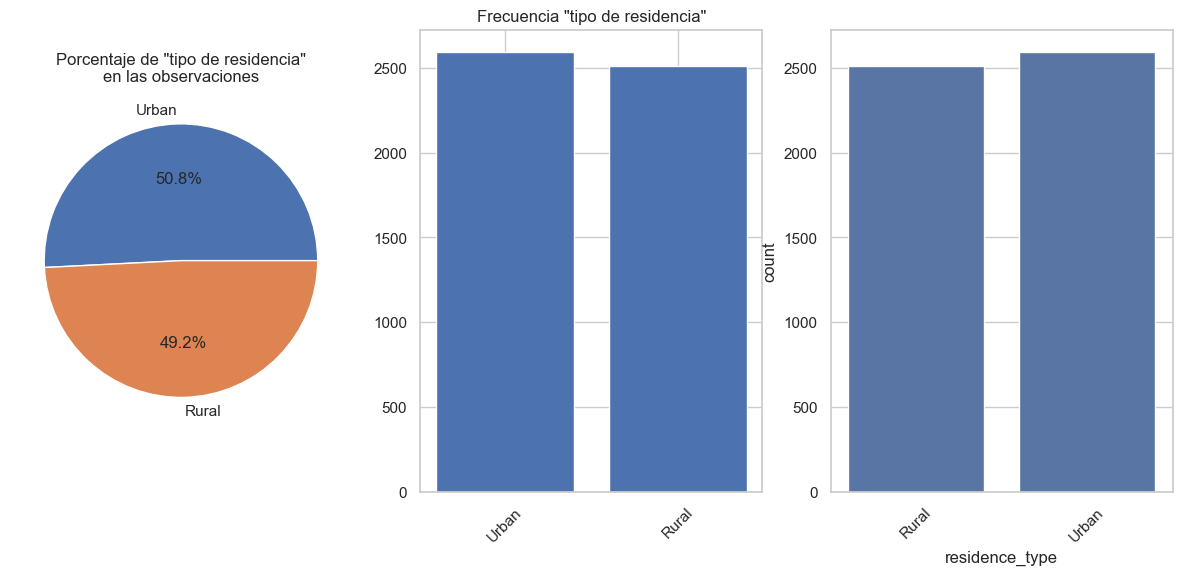

In [172]:
# Creamos las graficas graficas

fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Pie
ax[0].pie(percentage_residence_t, labels=percentage_residence_t.index, autopct="%.1f%%")
ax[0].title.set_text('Porcentaje de "tipo de residencia"\nen las observaciones')
# Bar - Countplot
ax[1].bar(freq_residence_t.index, height=freq_residence_t.values)
ax[1].title.set_text('Frecuencia "tipo de residencia"')
sns.countplot(data=data, x="residence_type", ax=ax[2])
ax[1].tick_params(axis="x", rotation=45)
ax[2].tick_params(axis="x", rotation=45)

plt.show()

([<matplotlib.patches.Wedge at 0x18fc307b1a0>,
 [Text(-0.02772429096401782, 1.0996505643569428, 'Urban'),
  Text(0.027724290964017198, -1.0996505643569428, 'Rural')],
 [Text(-0.018902925657284877, 0.7497617484251882, '50.8%'),
  Text(0.01890292565728445, -0.7497617484251882, '49.2%')])

Text(0.5, 1.0, 'Porcentaje de tipos de trabajo')

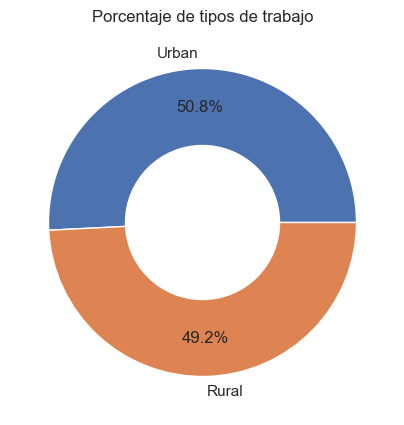

In [173]:
plt.pie(
    percentage_residence_t,
    labels=percentage_residence_t.index,
    autopct="%1.1f%%",
    pctdistance=0.75,
)
centre_circle = plt.Circle((0, 0), 0.5, fc="white")  # white
fig = plt.gcf()
fig.set_figwidth(5)
fig.set_figheight(5)
fig.gca().add_artist(centre_circle)
plt.title("Porcentaje de tipos de trabajo")

plt.show()

### Hallazgos

- Nuestra variable de residence type es de baja cardinalidad pues solo hay dos valores únicos (Uraban, Rural).
- En esta columna los datos estan balanceados. Las personas que viven en un entorno rural en nuestra muestra es del 49.2% y las personas que viven en un entorno urbano es de 50.2%.
- El tipo de vivienda para nuestro análisis es algo fundamental ya que es una variable la cual puede determinar si el tipo de vivienda puede llegar a inferir en la posibiidad de que una persona sea más propensa a tener un derrame cerebral.


# MULTIVARIADO


## Analisis de correlación


Text(0.5, 1.0, 'Correlación de Spearman')

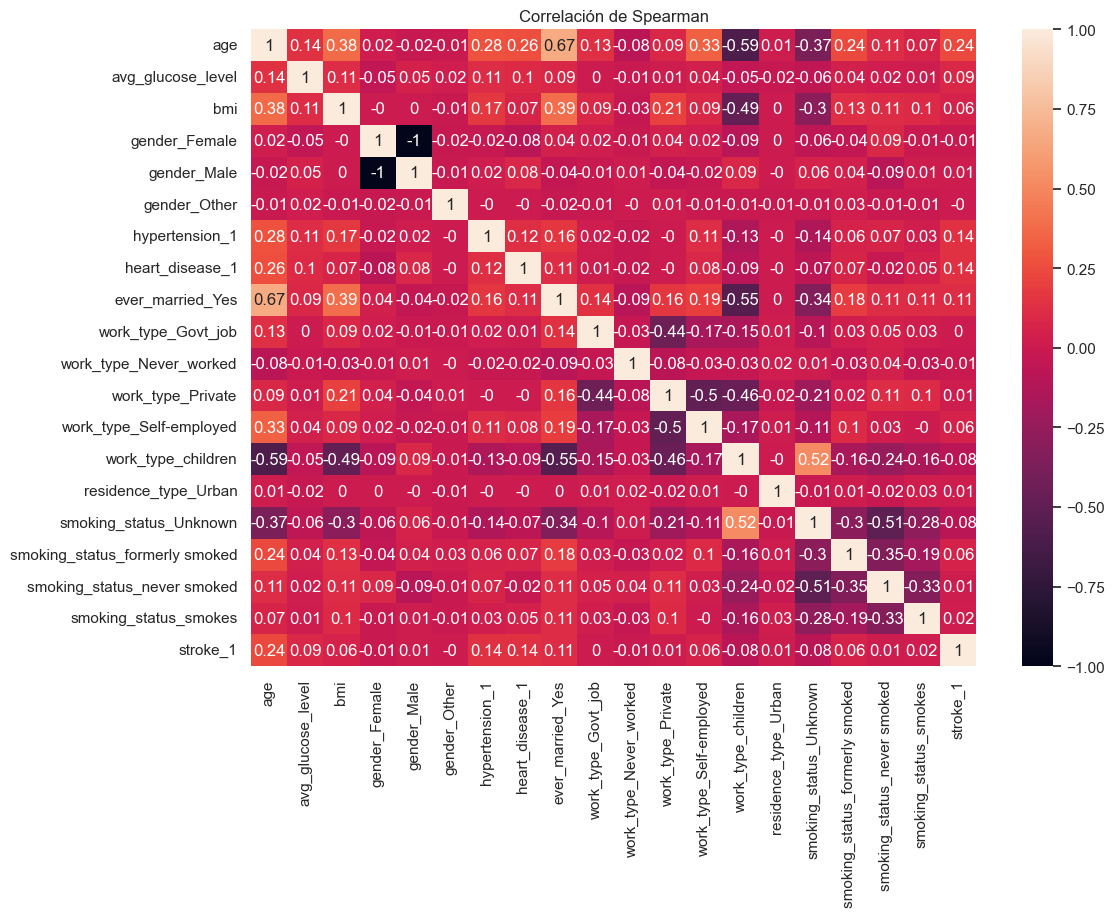

In [174]:
from matplotlib import pyplot

# Heatmap
# Map vars to numerical values
size_heatmaps = (11.7, 8.27)

data_heatmap = data_dumms_todas.copy().drop(columns="id")

# Skip BMI Null values
data_heatmap = data_heatmap.loc[~data_heatmap["bmi"].isna()]

# Correlacion de spearman por que no buscamos relaciones lineales
corr_matrix = data_heatmap.corr(method="spearman")
fig, ax = pyplot.subplots(figsize=size_heatmaps)
sns.heatmap(corr_matrix.round(2), annot=True).set_title("Correlación de Spearman")

### Resultados correlación de Spearman

Edad, hipertensión y si tuvieron un problema del corazon son las que más corralación tienen con STROKE, siendo la mejor la edad.

BMI no tiene relación con stroke, solo un poco de relacion con el tipo de trabajo privado, con si estuvieron casados o no y con la edad (Relaciones muy pobres).


Text(0.5, 1.0, 'Correlación Phik')

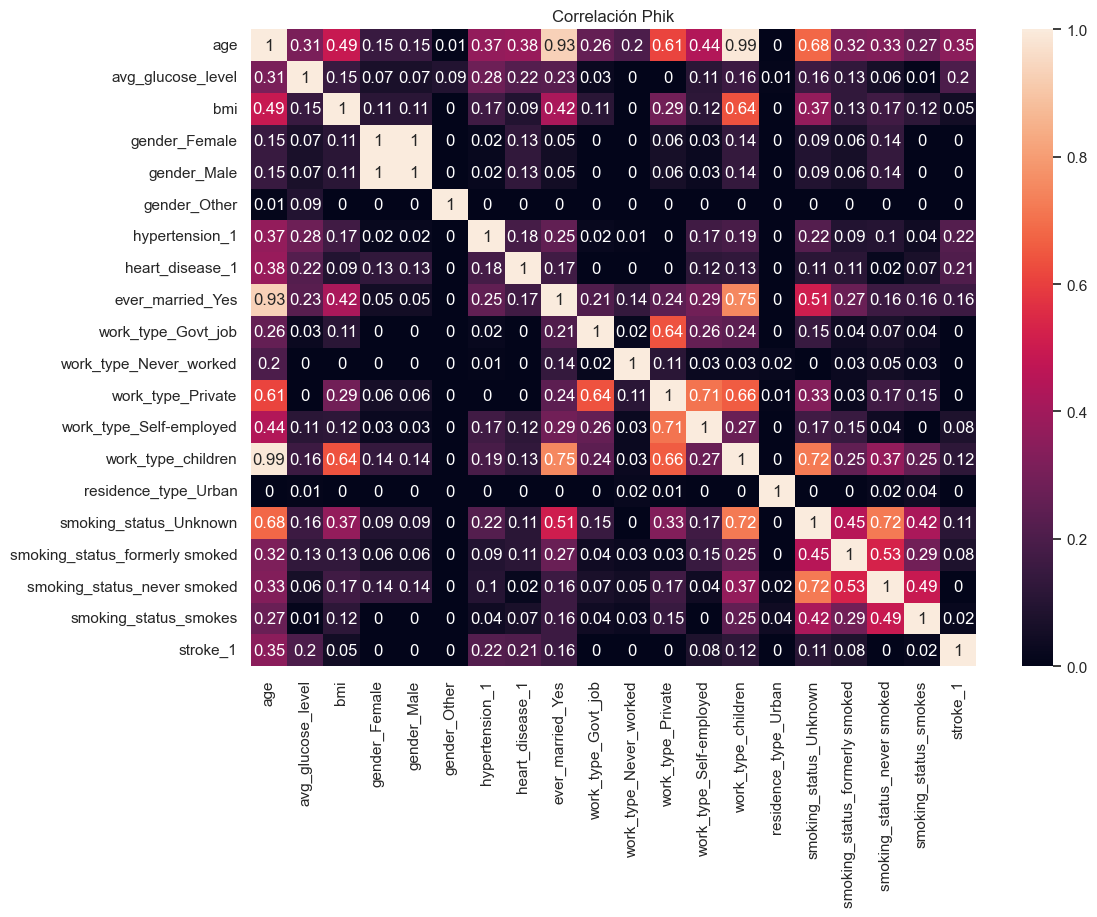

In [175]:
import phik
from phik import resources, report

# PHIK Correlation
pk_corr = data_heatmap.phik_matrix(interval_cols=ratio)
fig, ax = pyplot.subplots(figsize=size_heatmaps)
sns.heatmap(pk_corr.round(2), annot=True).set_title("Correlación Phik")

Lo mismo se repite con la correlación PHIK, podemos observar que edad, hypertensión, glucosa promedio y si tuvieron enfermedad del corazon son los unicos datos que podrian ayudarnos a predecir si una persona podria tener un stroke.


## Análisis de significancia


In [176]:
from scipy import stats as st

for i in ["stroke_1"]:
    for j in ratio + [
        "hypertension_1",
        "heart_disease_1",
        "gender_Female",
        "gender_Male",
        "smoking_status_Unknown",
        "smoking_status_formerly smoked",
        "smoking_status_never smoked",
        "smoking_status_smokes",
    ]:
        pb = st.pointbiserialr(data_heatmap[i], data_heatmap[j])
        print(
            f"Correlación de punto biserial entre variables {i} - {j} y correlación de Pearson"
        )
        print(pb)
        if pb[1] < 0.05:
            f"Los grupos de {i} NO tienen iguales medias de {j}."
            f"Sí existe una correlación significativa"
        else:
            f"Los grupos de {i} tienen iguales medias de {j}"
            "NO existe una correlación significativa"
        print("----------")

Correlación de punto biserial entre variables stroke_1 - age y correlación de Pearson
SignificanceResult(statistic=0.2323308555348592, pvalue=3.6556933219387066e-61)


'Los grupos de stroke_1 NO tienen iguales medias de age.'

'Sí existe una correlación significativa'

----------
Correlación de punto biserial entre variables stroke_1 - avg_glucose_level y correlación de Pearson
SignificanceResult(statistic=0.13893586200507596, pvalue=1.3799691107203187e-22)


'Los grupos de stroke_1 NO tienen iguales medias de avg_glucose_level.'

'Sí existe una correlación significativa'

----------
Correlación de punto biserial entre variables stroke_1 - bmi y correlación de Pearson
SignificanceResult(statistic=0.04237366114923526, pvalue=0.002983269099740741)


'Los grupos de stroke_1 NO tienen iguales medias de bmi.'

'Sí existe una correlación significativa'

----------
Correlación de punto biserial entre variables stroke_1 - hypertension_1 y correlación de Pearson
SignificanceResult(statistic=0.1425146058811324, pvalue=1.0816791323284687e-23)


'Los grupos de stroke_1 NO tienen iguales medias de hypertension_1.'

'Sí existe una correlación significativa'

----------
Correlación de punto biserial entre variables stroke_1 - heart_disease_1 y correlación de Pearson
SignificanceResult(statistic=0.13793778762220277, pvalue=2.774232441217095e-22)


'Los grupos de stroke_1 NO tienen iguales medias de heart_disease_1.'

'Sí existe una correlación significativa'

----------
Correlación de punto biserial entre variables stroke_1 - gender_Female y correlación de Pearson
SignificanceResult(statistic=-0.006850907930453642, pvalue=0.6313076318772032)


'Los grupos de stroke_1 tienen iguales medias de gender_Female'

'NO existe una correlación significativa'

----------
Correlación de punto biserial entre variables stroke_1 - gender_Male y correlación de Pearson
SignificanceResult(statistic=0.006938779897867138, pvalue=0.6269370366326256)


'Los grupos de stroke_1 tienen iguales medias de gender_Male'

'NO existe una correlación significativa'

----------
Correlación de punto biserial entre variables stroke_1 - smoking_status_Unknown y correlación de Pearson
SignificanceResult(statistic=-0.07501556909762552, pvalue=1.4250714281793292e-07)


'Los grupos de stroke_1 NO tienen iguales medias de smoking_status_Unknown.'

'Sí existe una correlación significativa'

----------
Correlación de punto biserial entre variables stroke_1 - smoking_status_formerly smoked y correlación de Pearson
SignificanceResult(statistic=0.0573197111233129, pvalue=5.860858628288544e-05)


'Los grupos de stroke_1 NO tienen iguales medias de smoking_status_formerly smoked.'

'Sí existe una correlación significativa'

----------
Correlación de punto biserial entre variables stroke_1 - smoking_status_never smoked y correlación de Pearson
SignificanceResult(statistic=0.010723194916526926, pvalue=0.4525666371910687)


'Los grupos de stroke_1 tienen iguales medias de smoking_status_never smoked'

'NO existe una correlación significativa'

----------
Correlación de punto biserial entre variables stroke_1 - smoking_status_smokes y correlación de Pearson
SignificanceResult(statistic=0.02153042510683006, pvalue=0.1314767704912277)


'Los grupos de stroke_1 tienen iguales medias de smoking_status_smokes'

'NO existe una correlación significativa'

----------


### Resultados

Pudimos observar que los datos que más nos pueden servir para hacer la predicción de stroke, son age y avg_glucouse_level, dejendo en claro que la relación de BMI con stroke es poca.


### Eliminación de columna BMI

Debido a que se cuentan con un 16% de personas de las cuales tuvieron un stroke y no sabemos su BMI (NAN), decidimos eliminar la columna ya que los analisis de significancia y correlación mostraron resultados muy bajos en cuanto a la relación de STROKE y BMI.


In [177]:
data.drop(columns="bmi")
data_dumms_todas.drop(columns="bmi")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,smoking_status,stroke,avg_glucose_bn
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,"(114.09, 271.74]"
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,"(114.09, 271.74]"
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,"(91.885, 114.09]"
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,"(114.09, 271.74]"
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,"(114.09, 271.74]"
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0,"(77.245, 91.885]"
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0,"(114.09, 271.74]"
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0,"(77.245, 91.885]"
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0,"(114.09, 271.74]"


,id,age,avg_glucose_level,gender_Female,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,9046,67.0,228.69,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1
1,51676,61.0,202.21,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
2,31112,80.0,105.92,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1
3,60182,49.0,171.23,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1
4,1665,79.0,174.12,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,83.75,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
5106,44873,81.0,125.20,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
5107,19723,35.0,82.99,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
5108,37544,51.0,166.29,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


Emiliano


Analisis de ever_married, work_type y stroke con respecto a hypertension


hypertension con respecto a ever_married


<Axes: xlabel='ever_married', ylabel='count'>

Text(0.5, 1.0, 'Ever Married con respecto a hypertension')

Text(0, 10, '1704')

Text(0, 10, '2908')

Text(0, 10, '53')

Text(0, 10, '445')

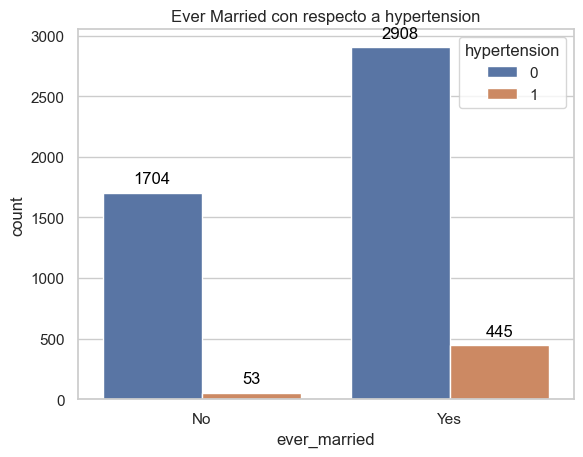

In [178]:
sns.countplot(data=data, x="ever_married", hue="hypertension")

plt.title("Ever Married con respecto a hypertension")

ax = plt.gca()  # Obtener el eje actual

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Verificar que la altura sea mayor que cero
        height = int(height)  # Convertir la etiqueta a entero
        ax.annotate(
            f"{height}",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
            va="center",
            fontsize=12,
            color="black",
            xytext=(0, 10),
            textcoords="offset points",
        )

plt.show()

Podemos concluir que solo 445 personas estuvieron casados y tambien tenian hipertension.


hypertension con respecto a work_type


<Axes: xlabel='work_type', ylabel='count'>

Text(0.5, 1.0, 'Work Type con respecto a ypertension')

Text(0, 10, '584')

Text(0, 10, '22')

Text(0, 10, '2644')

Text(0, 10, '675')

Text(0, 10, '687')

Text(0, 10, '73')

Text(0, 10, '281')

Text(0, 10, '144')

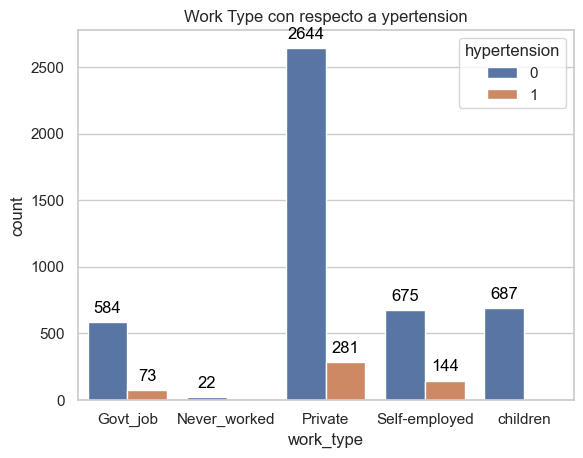

In [184]:
sns.countplot(data=data, x="work_type", hue="hypertension")
plt.title("Work Type con respecto a ypertension")

ax = plt.gca()  # Obtener el eje actual

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Verificar que la altura sea mayor que cero
        height = int(height)  # Convertir la etiqueta a entero
        ax.annotate(
            f"{height}",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
            va="center",
            fontsize=12,
            color="black",
            xytext=(0, 10),
            textcoords="offset points",
        )

plt.show()

Podemos concluir que 498 personas con trabajo (Trabajador de gobieron = 73, Trabajador privado = 281 y Trabajador autónomo = 144) tambien tenian hipertension.

Podemos decir tambien que las personas sin trabajo no han tenido derrames.


hypertension con respecto a stroke


<Axes: xlabel='stroke', ylabel='count'>

Text(0.5, 1.0, 'Stroke con respecto a hypertension')

Text(0, 10, '4429')

Text(0, 10, '183')

Text(0, 10, '432')

Text(0, 10, '66')

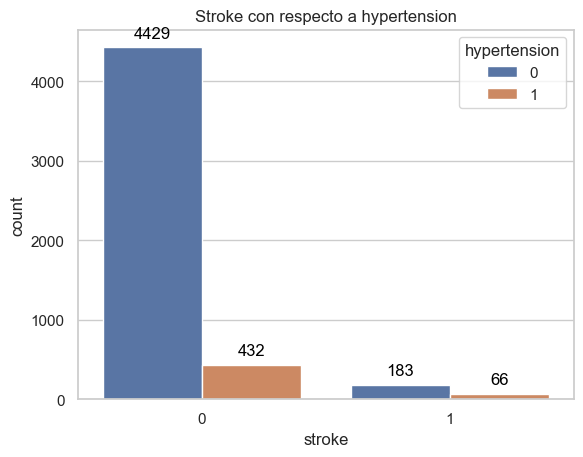

In [185]:
sns.countplot(data=data, x="stroke", hue="hypertension")
plt.title("Stroke con respecto a hypertension")

ax = plt.gca()  # Obtener el eje actual

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Verificar que la altura sea mayor que cero
        height = int(height)  # Convertir la etiqueta a entero
        ax.annotate(
            f"{height}",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
            va="center",
            fontsize=12,
            color="black",
            xytext=(0, 10),
            textcoords="offset points",
        )

plt.show()

Podemos concluir que solo 66 personas tuvieron un derrame y tambien hipertension.
